### Projeto de Resolução de Sistemas de Equações

#### O objetivo deste projeto é reconstruir uma imagem a partir de sua versão modificada.

In [1]:
from PIL import Image 
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt

#### Carregando a imagem original

Qualquer imagem pode ser descrita como uma matriz, em que cada elemento representa um pixel. O valor de cada pixel representa sua cor.
Nesse sentido, uma matriz (ou outra estrutura vetorial) pode ser descrita a partir de uma base. Comumente, tal base consiste
em três matrizes: R, G e B. A matriz R (red) contém somente tons de vermelho, a matriz G (green) contém somente tons de verde e a matriz B (blue) contém somente tons de azul. Por padrão, as matrizes R, G e B contém valores de 8 bits, ou seja, valores numéricos inteiros de 0 a 255. Abaixo está a imagem em estudo, bem como as suas componentes R, G e B.

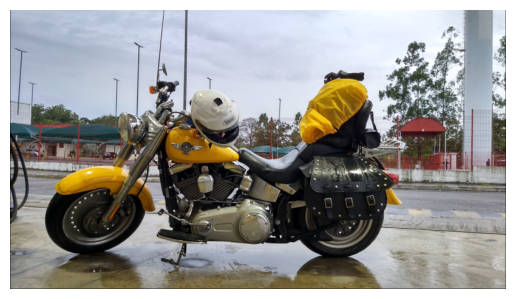

<Figure size 1000x2000 with 0 Axes>

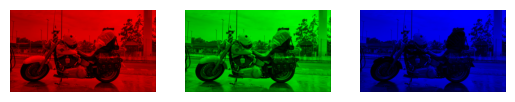

<Figure size 3000x4000 with 0 Axes>

In [2]:
moto = Image.open("download.png")
moto.convert('RGB')
matrizImagem = np.array(moto)

plt.imshow(matrizImagem)
plt.axis('off')

plt.figure(figsize=(10,20))
plt.show()

matrizImagemR = np.copy(matrizImagem)
matrizImagemG = np.copy(matrizImagem)
matrizImagemB = np.copy(matrizImagem)

for colunaIndice in range(matrizImagem.shape[0]):
    coluna = matrizImagem[colunaIndice]
    for pixelIndice in range(coluna.shape[0]):
        matrizImagemR[colunaIndice][pixelIndice][1] = 0
        matrizImagemR[colunaIndice][pixelIndice][2] = 0
        matrizImagemG[colunaIndice][pixelIndice][0] = 0
        matrizImagemG[colunaIndice][pixelIndice][2] = 0
        matrizImagemB[colunaIndice][pixelIndice][0] = 0
        matrizImagemB[colunaIndice][pixelIndice][1] = 0
        
plt.subplot(1, 3, 1)
plt.imshow(matrizImagemR)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(matrizImagemG)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(matrizImagemB)
plt.axis('off')

plt.figure(figsize=(30,40))
plt.show()


Algo que é fundamental entender é que, conforme foi dito antes, por padrão, as matrizes R, G e B tem valores inteiros de 0 a 255. Porém, determinados procedimentos de manipulação de matrizes podem fazer com que essas matrizes obtenham valores quebrados. A exemplo, pode-se citar a multiplicação por escalar. Esse procedimento deve mudar a intensidade da cor dos pixels, porém é mais fácil de ser descrito matematicamente ao utilizar números entre 0 e 1, pois os resultado da multiplicação permanece um número float entre 0 e 1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


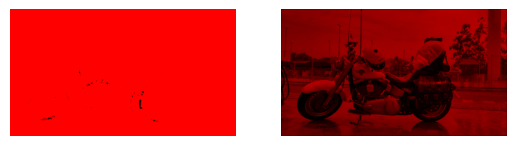

In [3]:
mudancaDeTomInteiro = 0.73*matrizImagemR
mudancaDeTomFloat = 0.73*matrizImagemR/255

plt.subplot(1, 2, 1)
plt.imshow(mudancaDeTomInteiro)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mudancaDeTomFloat)
plt.axis('off')

plt.show()

Como é possível ver acima, a imagem a esquerda é resultado da multiplicação dos números inteiros por 0,73. Naturalmente, alguns valores resultantes dessa multiplicação serão valores maiores que 1 com casa decimal, o que é incompatível com a modelagem RGB de imagens. Note que, na imagem à direita, a qual foi gerada com valores entre 0 e 1, obteve-se o resultado esperado sem erros.

Nesse sentido, é recomendado que, com imagens, trabalhe-se com valores entre 0 e 1 para as matrizes R, G e B.

Felizmente, a linguagem Python possui um recurso que realiza o typecast de números float maiores que 1 e os converte para inteiros:

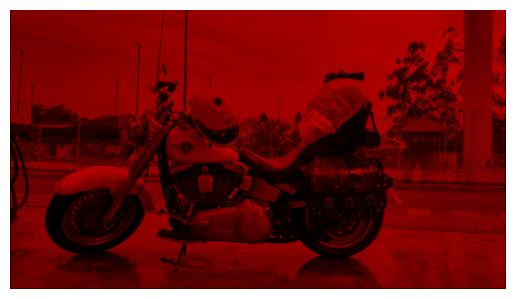

In [4]:
mudancaDeTomInteiro = np.array(mudancaDeTomInteiro,np.int32)

plt.imshow(mudancaDeTomInteiro)
plt.axis('off')

plt.show()

Nota-se que, mesmo utilizando a matriz de números inteiros, ao fazer o typecast para o tipo int32 (inteiro com 32 bits), elimina-se a parte decimal do número e observa-se uma matriz idêntica àquela encontrada com os números de 0 a 1.

### Entendendo o problema:
Um hacker adultera as componentes R, G e B da imagem original (exibida acima), gerando uma base com as componentes L, M e N.
Assim como em qualquer matriz de formação de imagens, seus valores devem estar entre 0 e 255. Ele utiliza uma transformação linear para gerar tais componentes. O código abaixo, que gera as componentes, não será revelado aos alunos.

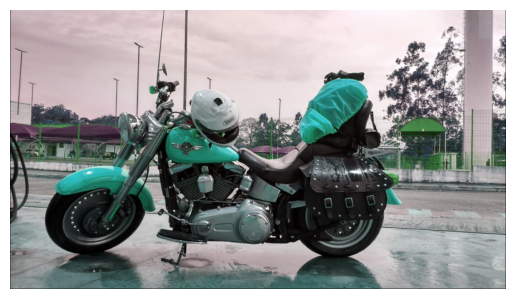

<Figure size 3000x4000 with 0 Axes>

In [5]:
L = (0.1*matrizImagemR + 0.1*matrizImagemG + 0.8*matrizImagemB)
M = (0.8*matrizImagemR + 0*matrizImagemG + 0.2*matrizImagemB)
N = (0.1*matrizImagemR + 0.9*matrizImagemG + 0*matrizImagemB)

matrizImagemDistorcida = np.copy(matrizImagem)

for colunaIndice in range(L.shape[0]):
    coluna = L[colunaIndice]
    for pixelIndice in range(coluna.shape[0]):
        matrizImagemDistorcida[colunaIndice][pixelIndice][0] = sum(L[colunaIndice][pixelIndice])
        matrizImagemDistorcida[colunaIndice][pixelIndice][1] = sum(M[colunaIndice][pixelIndice])
        matrizImagemDistorcida[colunaIndice][pixelIndice][2] = sum(N[colunaIndice][pixelIndice])

matrizImagemDistorcida = np.array(matrizImagemDistorcida,np.int32)

plt.imshow(matrizImagemDistorcida)
plt.axis('off')

plt.figure(figsize=(30,40))
plt.show()

### Enunciado do problema:

Um hacker modificou as matrizes R, G e B que compõem as imagens, obtendo-se, assim, a imagem acima. Sendo um tanto quanto preguiçoso, ele aplicou somente uma transformação linear. A fim de retornar às cores originais, busca-se a transformação inversa. As componentes L, M e N são dadas em arquivos CSV.

In [6]:
#Arquivos CSV

### Resolvendo o problema:

A primeira parte da resolução do problema consiste em montar uma descrição matemática da situação. 
Nesse caso, é importante que o aluno perceba que uma transformação linear resulta em uma sequência de combinações lineares e, por consequência, equações lineares podem ser escritas de forma que as matrizes L, M e N sejam resultados de somas ponderadas das matrizes R, G e B.

$$
\left\{\begin{split}
&L(i,j) = f_1[R(i,j),G(i,j),B(i,j)] \qquad &(1)\\
&M(i,j) = f_2[R(i,j),G(i,j),B(i,j)] \qquad &(2)\\
&N(i,j) = f_3[R(i,j),G(i,j),B(i,j)] \qquad &(3)
\end{split}\right.
$$

onde $f_1$, $f_2$, e $f_3$ são funções lineares, $f_i : \mathbb{R} \rightarrow \mathbb{R}$. Cada função $f_i$ tem três parâmetros, ou pesos. No total, nove parâmetros podem ter sido usados, três em cada equação acima.

Nesse sentido, a fim de descobrir os valores dos pesos, será necessário criar três sistemas de três equações, cada um com os seguintes formatos:

$$
\left\{\begin{split}
&L(i,j) = f_{1,1} R(i,j) + f_{1,2} G(i,j) + f_{1,3} B(i,j)\\
&L(k,l) = f_{1,1} R(k,l) + f_{1,2} G(k,l) + f_{1,3} B(k,l)\\
&L(m,n) = f_{1,1} R(m,n) + f_{1,2} G(m,n) + f_{1,3} B(m,n)
\end{split}\right.
\Leftrightarrow\qquad
\mathbf{l} = f_{1,1}\mathbf{r} + f_{1,2}\mathbf{g} + f_{1,3}\mathbf{b}
$$

onde $(i,j)$, $(k,l)$, e $(m,n)$ representam três pixels diferentes, e $f_{1,1}$, $f_{1,2}$, e $f_{1,3}$ são os três parâmetros desconhecidos da função $f_1$. Isso deverá ser replicado para todos as funções: $f_1$, $f_2$ e $f_3$

Para que essa etapa seja resolvida, é necessário que o aluno perceba que a transformação seja invertível e que é possível reescrever esse sistema como uma multiplicação matriz-vetor.

##### Como encontrar os valores R, G e B para montar os sistemas acima?

Você pode se perguntar: como irei encontrar os valores de de L, M e N em $(i,j)$, $(k,l)$, e $(m,n)$ se eu desconheço as matrizes R, G e B e, por consequência, os valores de R, G e B em $(i,j)$, $(k,l)$, e $(m,n)$ ?

Para isso você deverá usar o bom senso. É notório da imagem que se trata de uma motocicleta, cujos pneus são pretos. Você também poderia pensar em folhas verdes e nuvens cor-de-cinza. 

Com isso, você pode montar o sistema 3x3 usando valores de R, G e B para três tons aproximados de cores que você acredita que estejam na imagem original e assim descobrir os valores dos pesos. 

Outra forma de usar essa mesma abordagem é usar a inversa:

$$
\left\{\begin{split}
\mathbf{r} &= \alpha_1 \mathbf{l} + \alpha_2 \mathbf{m} + \alpha_3 \mathbf{n}\\
\mathbf{g} &= \beta_1 \mathbf{l} + \beta_2 \mathbf{m} + \beta_3 \mathbf{n}\\
\mathbf{b} &= \gamma_1 \mathbf{l} + \gamma_2 \mathbf{m} + \gamma_3 \mathbf{n}
\end{split}\right.
$$

Monta-se o sistema acima para valores arbitrários de r e seus respectivos valores de l, m e n, formando assim, um sistema 3x3 e descobrindo cada valor de alpha. A mesma lógica é aplicada para os vetores g e b, para descobrir beta e gamma, respectivamente. 
Cada um desses sistemas é um produto matriz e vetor, e assim, é possível descobrir os vetores alpha, beta e gamma, multiplicando cada equação pela matriz inversa da matriz cujas colunas são os vetores L, M e N.

Depois disso, monta-se as matrizes R, G e B completas, utilizando os vetores alpha, beta e gamma para cada uma, respectivamente.